# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

# Creating datapoints in the form of circle

In [2]:
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating 3 circles

In [3]:
df = pd.DataFrame(PointsInCircum(500,1000))
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

In [4]:
df

,0,1
0,423.058631,-31.583666
1,472.598287,18.658758
2,475.488400,-52.942328
3,520.534294,-20.316290
4,441.915442,-19.899934
...,...,...
295,53.456792,5.061199
296,43.898112,-46.176403
297,53.864876,-61.516597
298,54.906196,-44.362077


# Plotting the current dataset

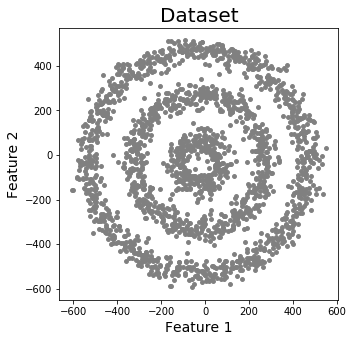

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],s=15,color='grey')

plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

plt.show()

# Using DBSCAN Algorithm

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=30,min_samples=6)

dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [7]:
df['DBSCAN_opt_labels']=dbscan.labels_

df['DBSCAN_opt_labels'].value_counts()

 4    604
 0    431
 2    352
 6    295
 1    109
-1     92
 5     63
 3     54
Name: DBSCAN_opt_labels, dtype: int64

# Plotting the final data

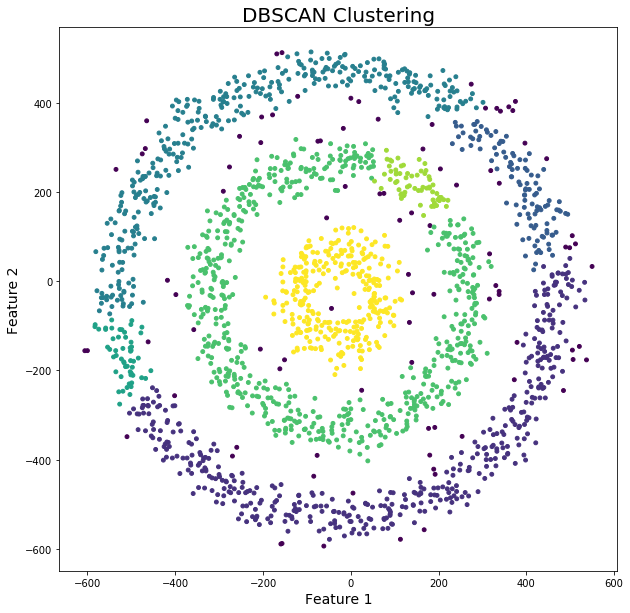

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("Mall_Customer.csv")

In [11]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
data.rename(columns={'Genre':'Gender','Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)

In [21]:
data.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


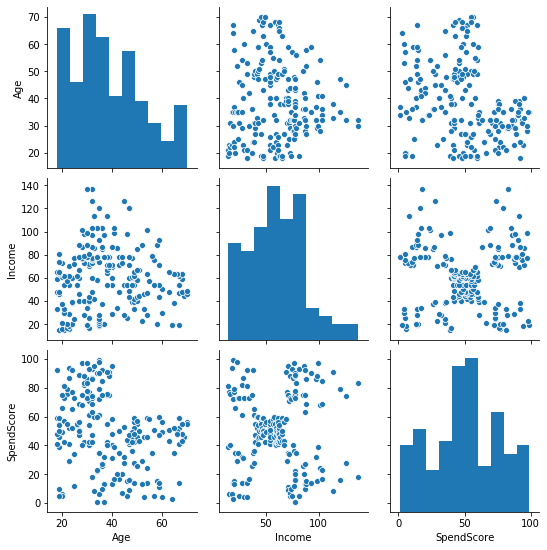

In [22]:
sns.pairplot(data)

From the above diagram, we can say that the customer id is not correlated with income, it's not an useful feature so we can remove that.

In [17]:
data = data.drop(['CustomerID'] , axis=1)
data.head()

,Genre,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


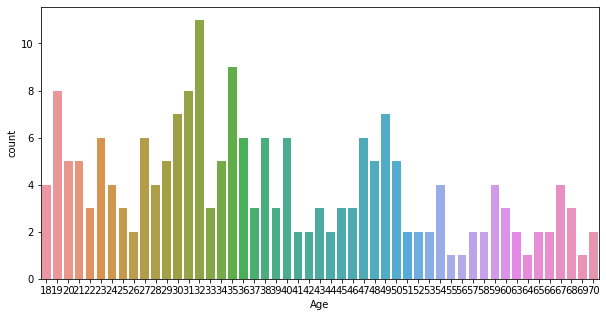

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data['Age'])

Peoples of age between 25 to 40 are mostly visiting mall than other age groups

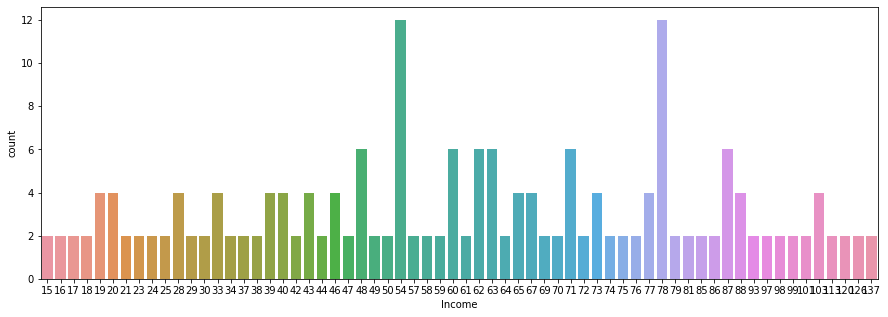

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(data['Income'])

Peoples of salary 54k and 78k are the mostly visited persons in mall.

Text(0, 0.5, 'Spendscore')

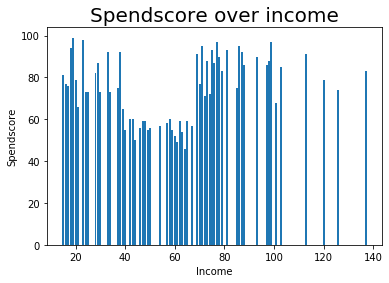

In [30]:
plt.bar(data['Income'],data['SpendScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

People of income in the range of 20k-40k and 70k-100k have the highest spend score

We are going to use the DBSCAN for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.

In [36]:
data.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [34]:
features = data.iloc[:,[2,3]].values

In [35]:
features

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [37]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [39]:
model = db.fit(features)

In [40]:
label = model.labels_

In [41]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [43]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores = np.zeros_like(label , dtype=bool)

sample_cores[db.core_sample_indices_] = True

#Calculating the number of clusters

n_clusters = len(set(label))- (1 if -1 in label else 0)

print('No of clusters:',n_clusters)

No of clusters: 9


In [45]:
y_means = db.fit_predict(features)

In [46]:
y_means

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

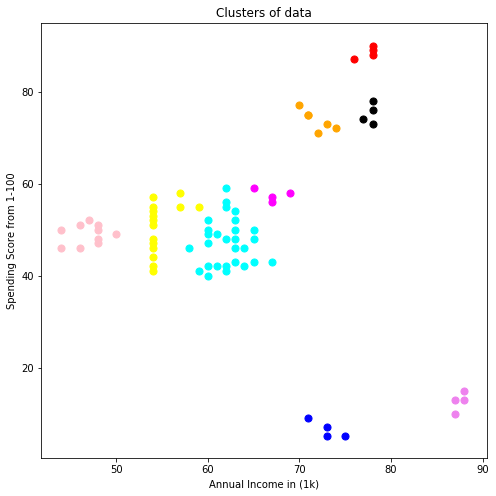

In [49]:
plt.figure(figsize=(8,8))

plt.scatter(features[y_means == 0, 0], features[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(features[y_means == 1, 0], features[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(features[y_means == 2, 0], features[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(features[y_means == 3, 0], features[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(features[y_means == 4, 0], features[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(features[y_means == 5, 0], features[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(features[y_means == 6, 0], features[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(features[y_means == 7, 0], features[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(features[y_means == 8, 0], features[y_means == 8, 1], s = 50, c = 'violet')

plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')

plt.show()

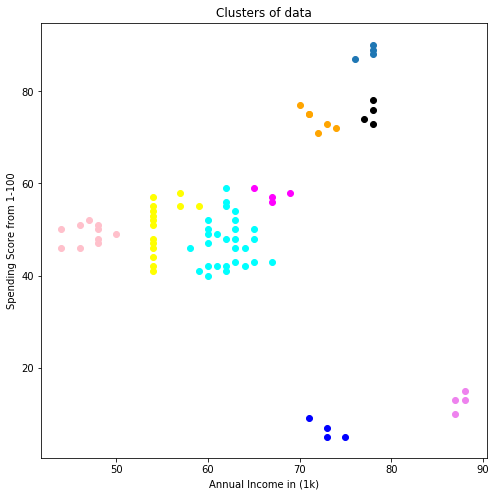

In [55]:
plt.figure(figsize=(8,8))

plt.scatter(features[y_means == 0, 0], features[y_means == 0, 1],  c = 'pink')
plt.scatter(features[y_means == 1, 0], features[y_means == 1, 1],  c = 'yellow')
plt.scatter(features[y_means == 2, 0], features[y_means == 2, 1],  c = 'cyan')
plt.scatter(features[y_means == 3, 0], features[y_means == 3, 1],  c = 'magenta')
plt.scatter(features[y_means == 4, 0], features[y_means == 4, 1],  c = 'orange')
plt.scatter(features[y_means == 5, 0], features[y_means == 5, 1],  c = 'blue')
plt.scatter(features[y_means == 6, 0], features[y_means == 6, 1],  c = 'red')
plt.scatter(features[y_means == 7, 0], features[y_means == 7, 1],  c = 'black')
plt.scatter(features[y_means == 8, 0], features[y_means == 8, 1],  c = 'violet')

plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')

plt.show()